In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1039,2020-07-19,United Kingdom,294214.0,294066.0,45349.0,45273.0,148.0,76.0
1040,2020-07-19,Germany,201991.0,201574.0,9096.0,9084.0,417.0,12.0
1041,2020-07-19,Iran,272875.0,271606.0,13969.0,13979.0,1269.0,-10.0
1042,2020-07-19,Turkey,218699.0,218717.0,5478.0,5475.0,-18.0,3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3005.9444444444443
RMSE =  7479.750284212451


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  292.8515325670498
RMSE =  684.2422739524368


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  15291.336633663366
RMSE =  19973.381606577794
-- World performances for deaths --
MAE =  1526.980198019802
RMSE =  1863.628110078099


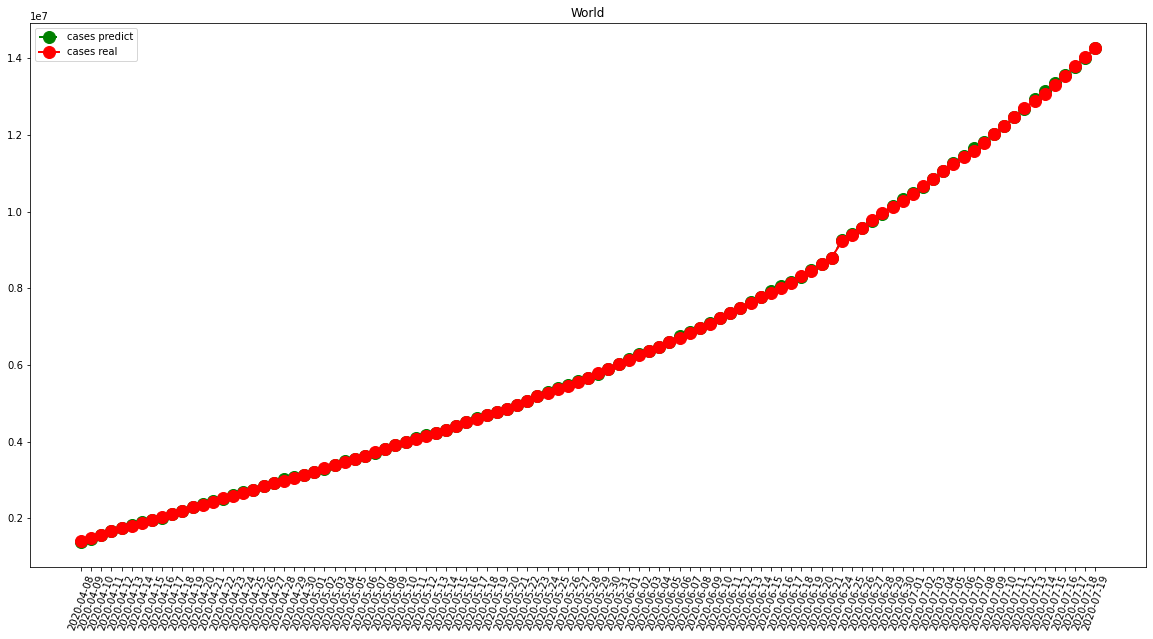

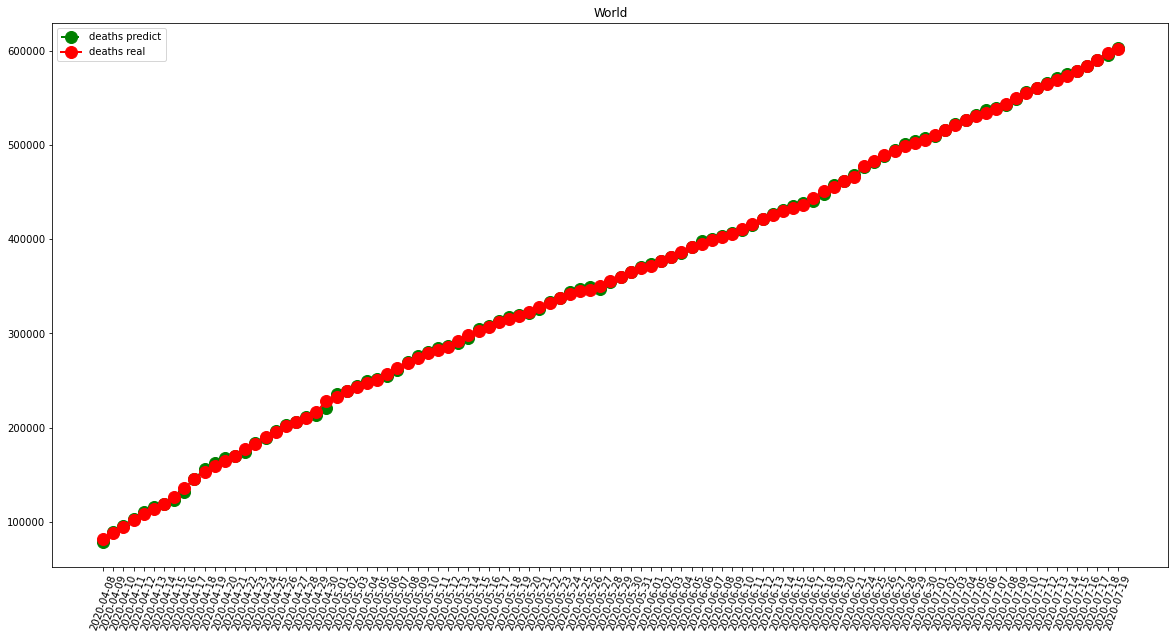

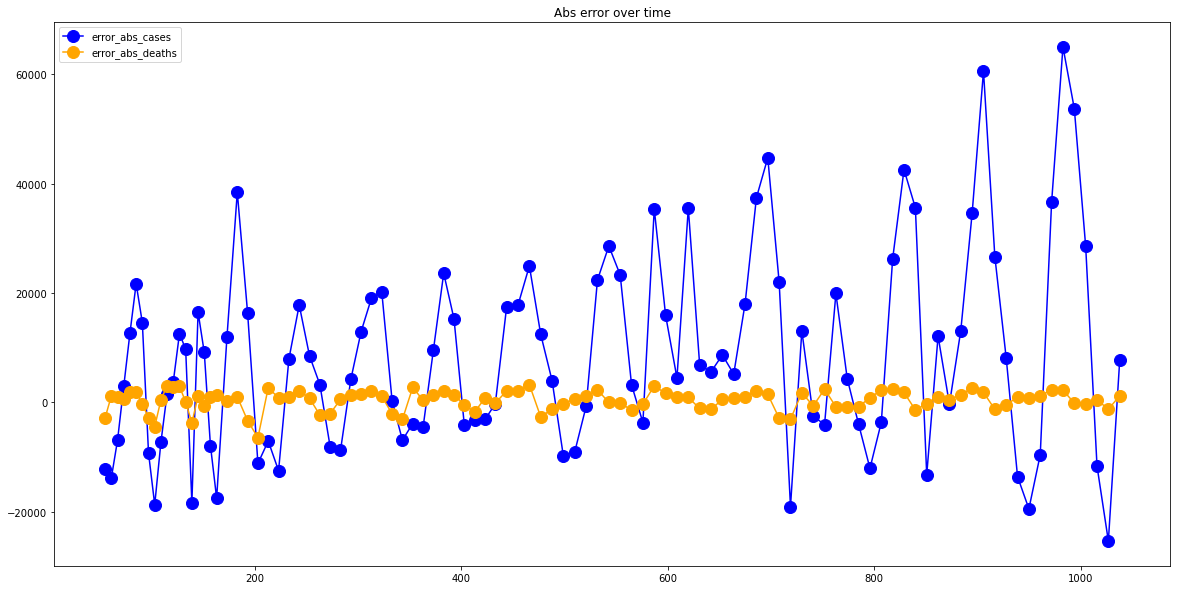

In [7]:
visShow("World")

-- France performances for cases --
MAE =  838.3513513513514
RMSE =  1388.4687560353982
-- France performances for deaths --
MAE =  161.2072072072072
RMSE =  318.0702511783909


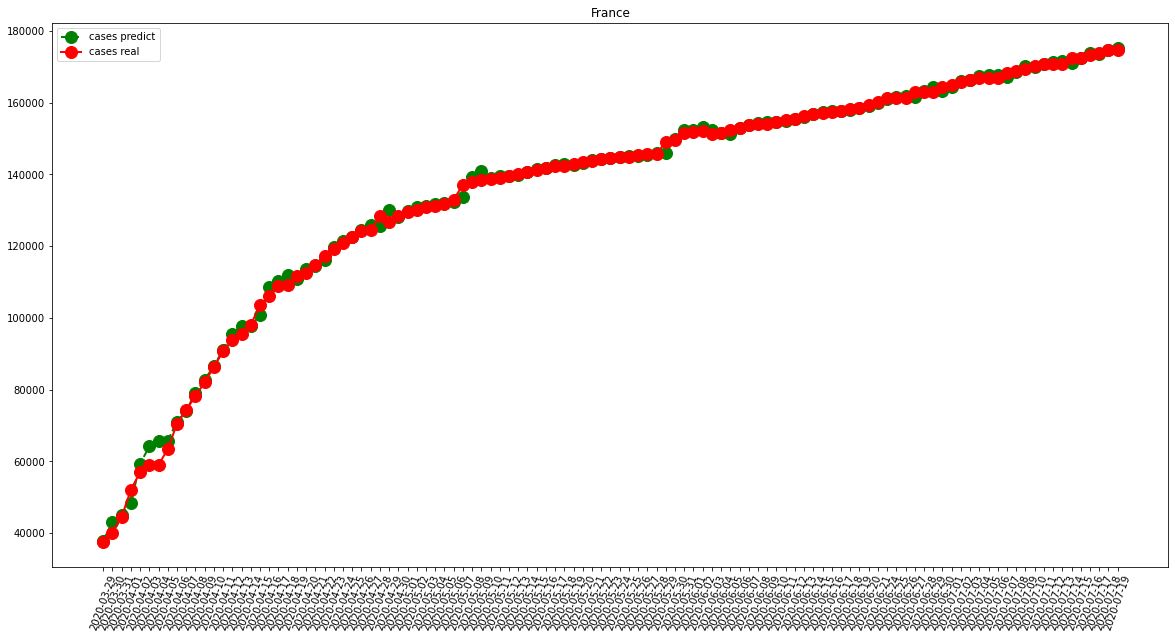

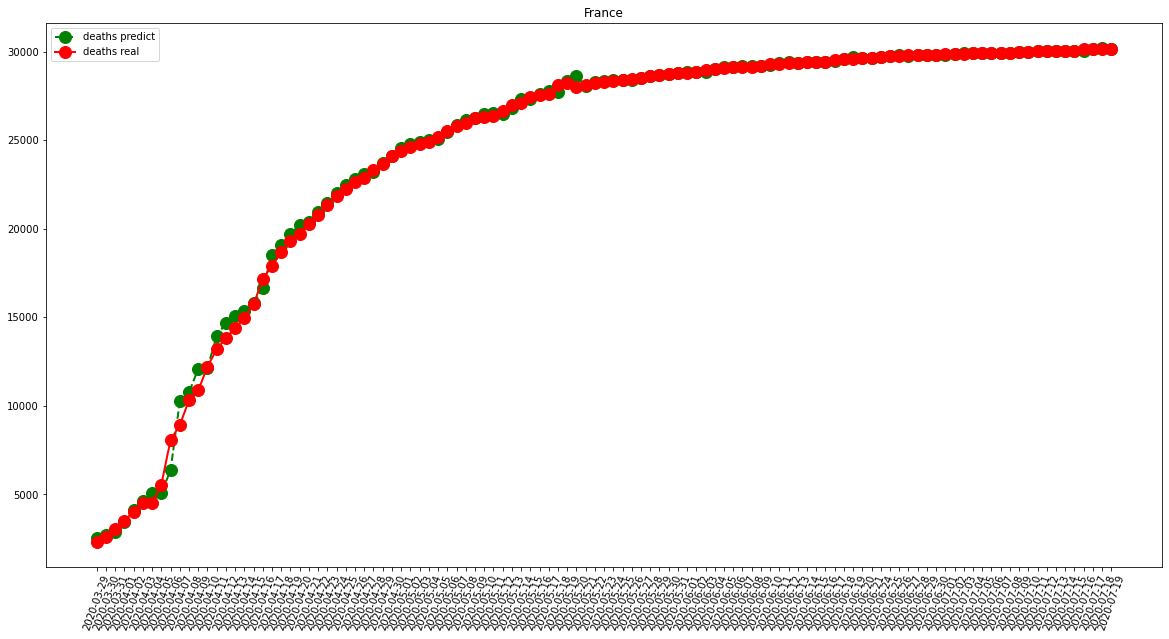

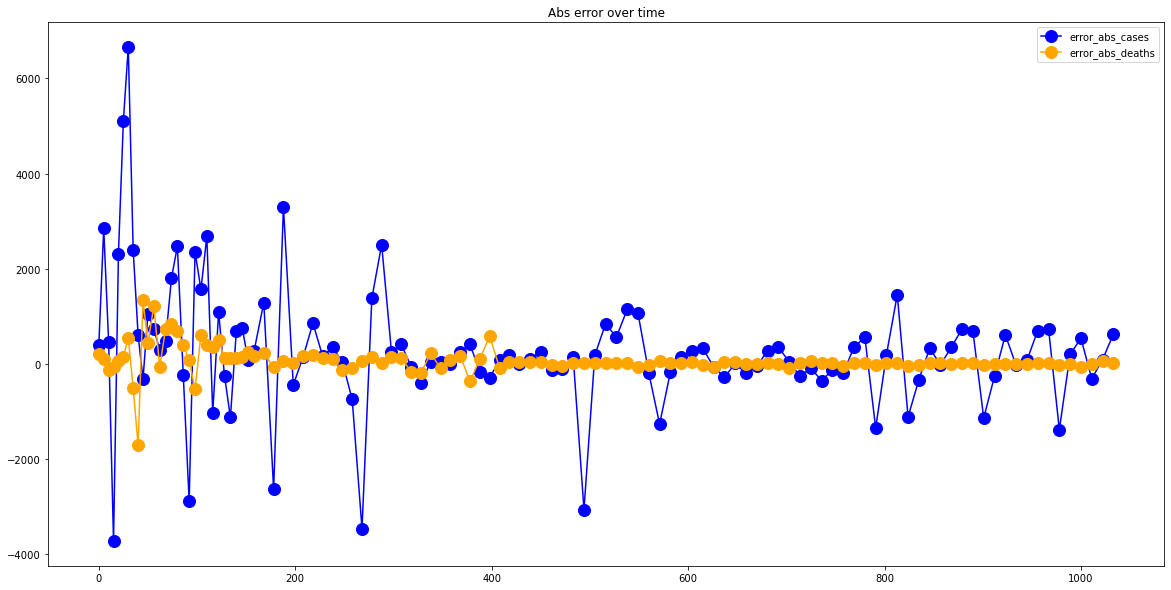

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  347.07207207207205
RMSE =  516.6264180777595
-- Italy performances for deaths --
MAE =  90.22522522522523
RMSE =  280.8085013214778


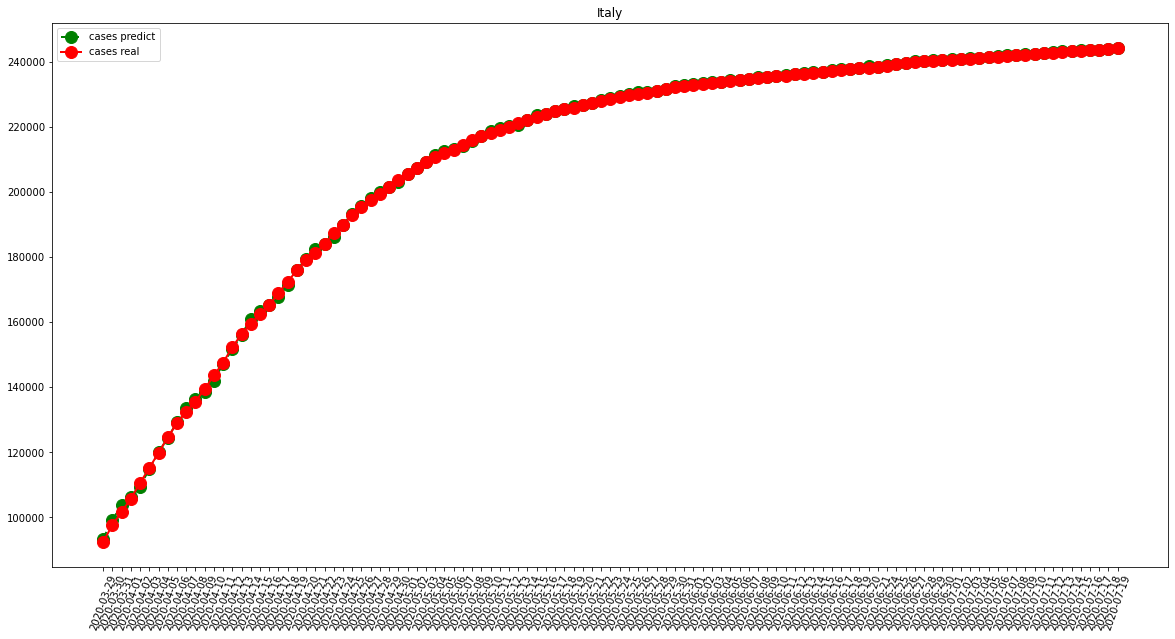

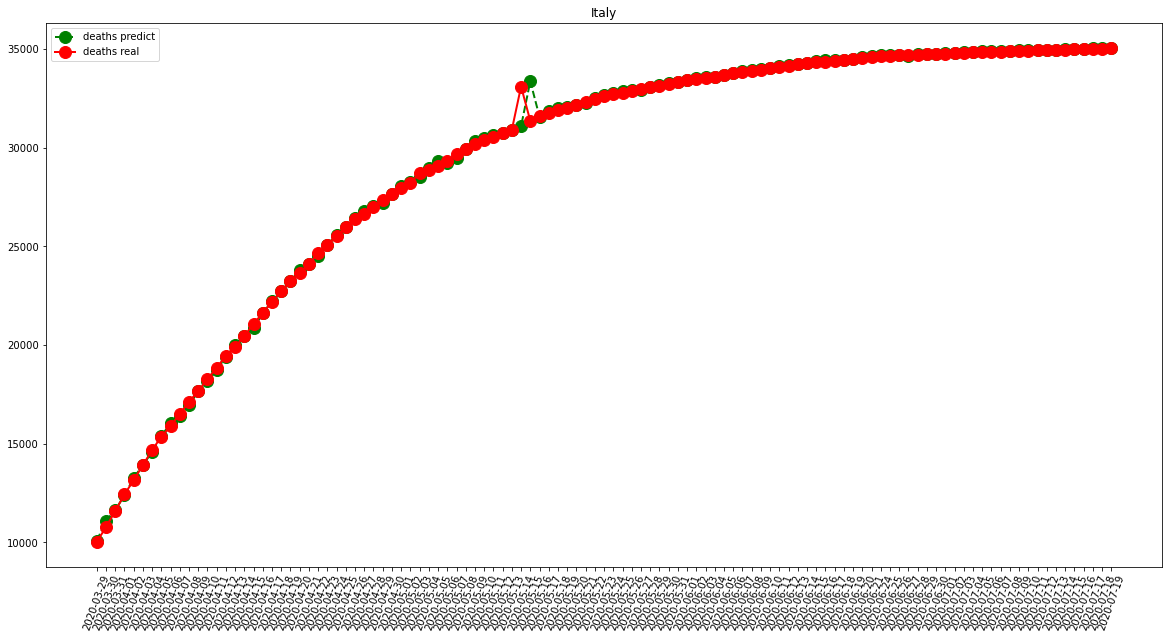

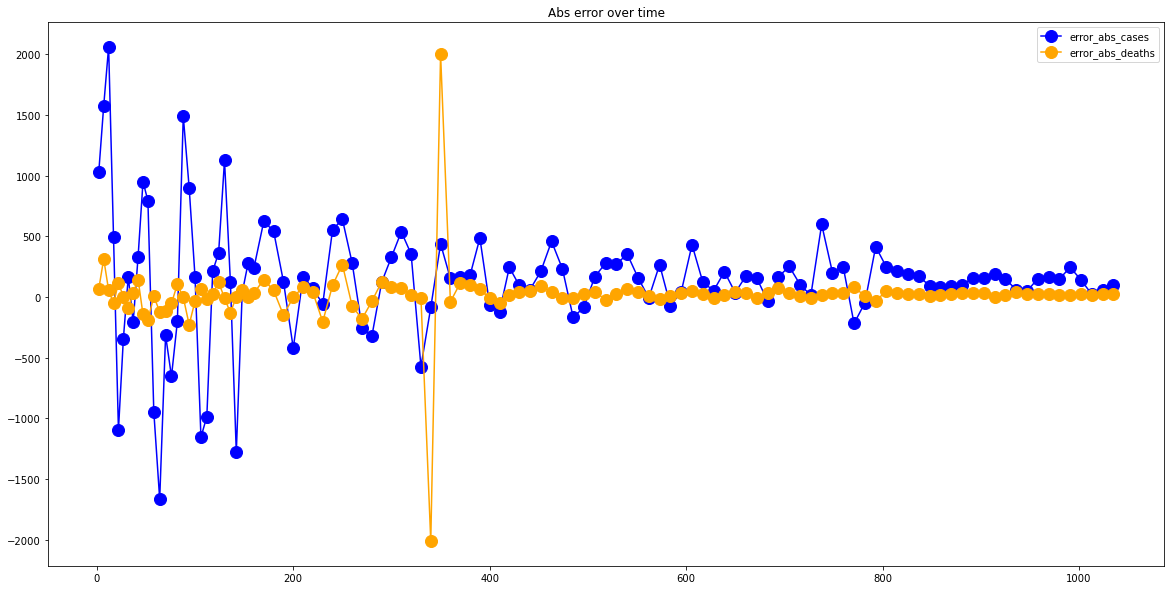

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  848.1171171171171
RMSE =  1965.9679206093026
-- Spain performances for deaths --
MAE =  164.6936936936937
RMSE =  385.26872568506127


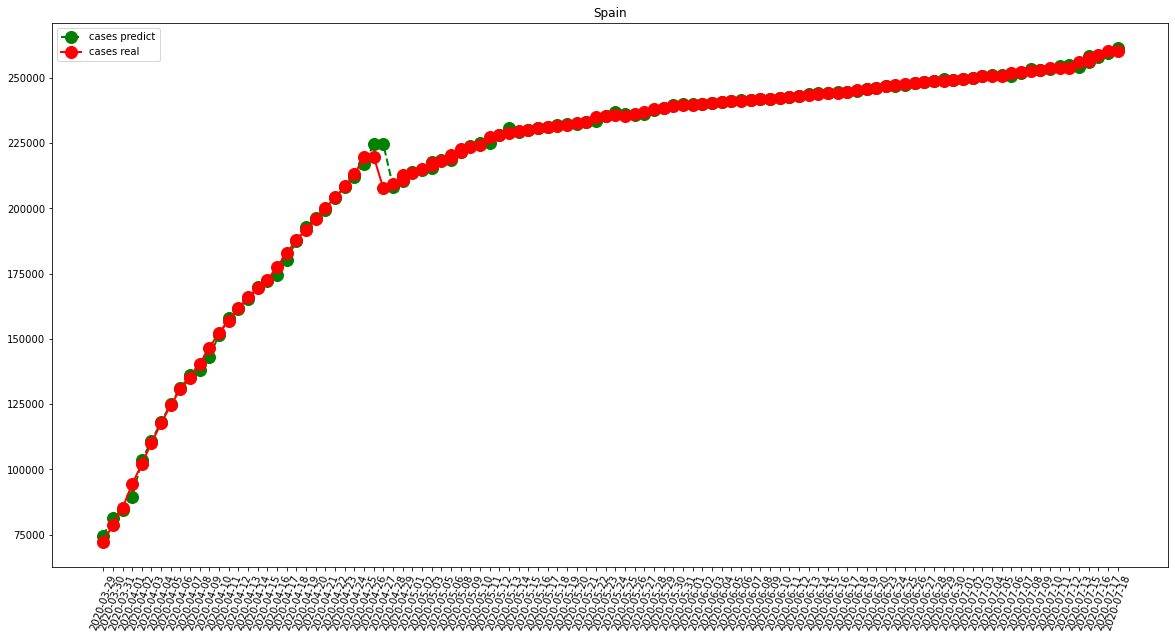

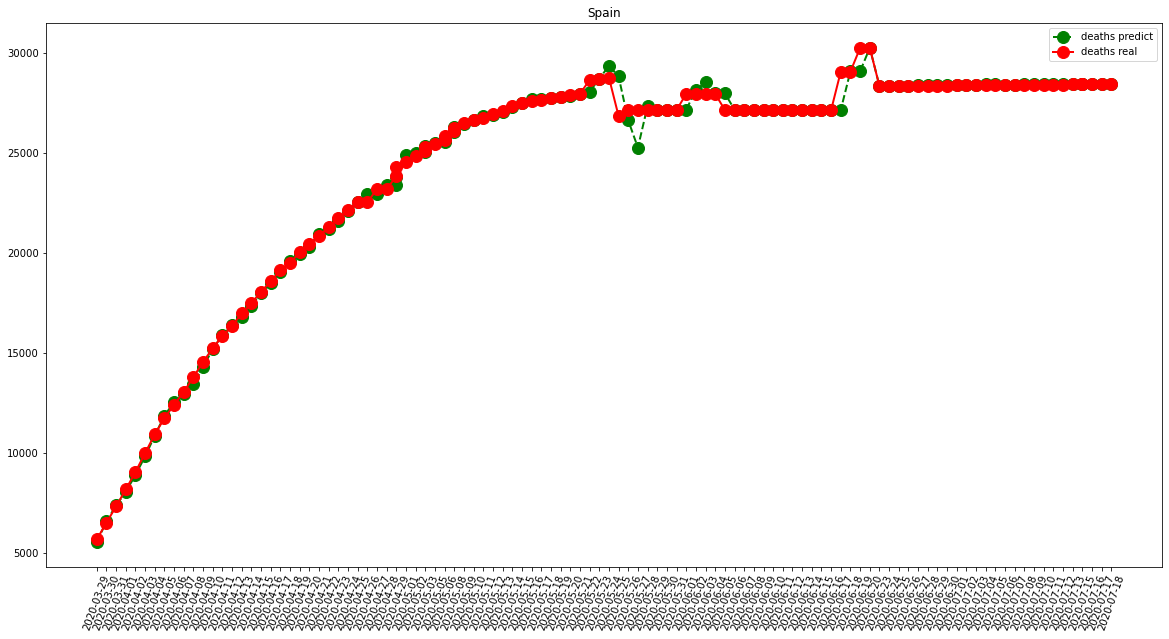

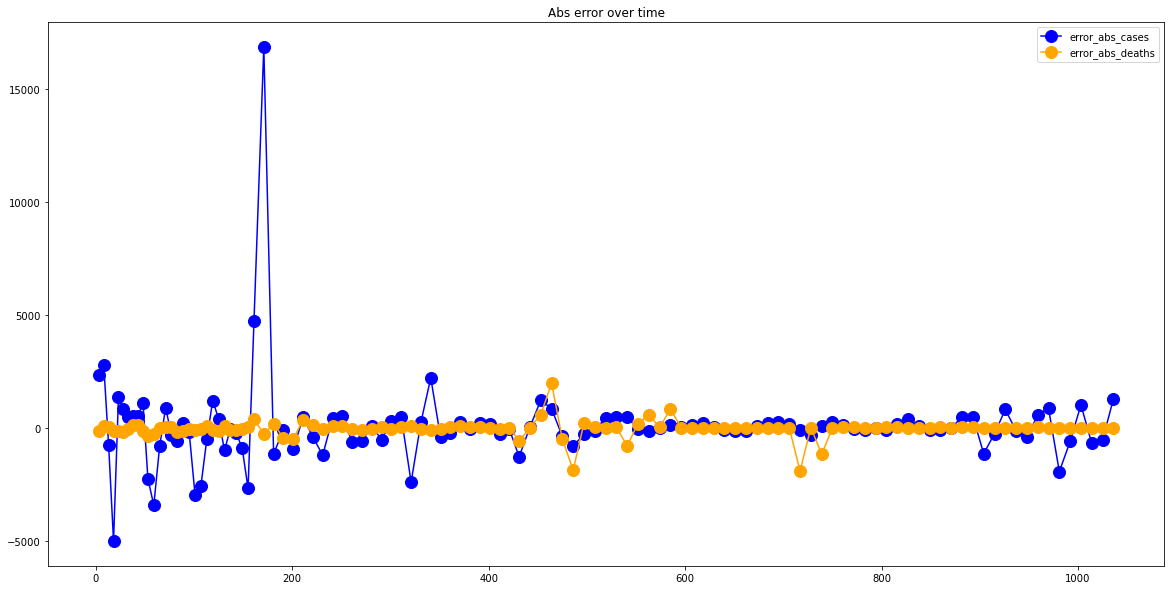

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5501.054054054054
RMSE =  7490.022998196569
-- United States performances for deaths --
MAE =  510.44144144144144
RMSE =  748.4331561263098


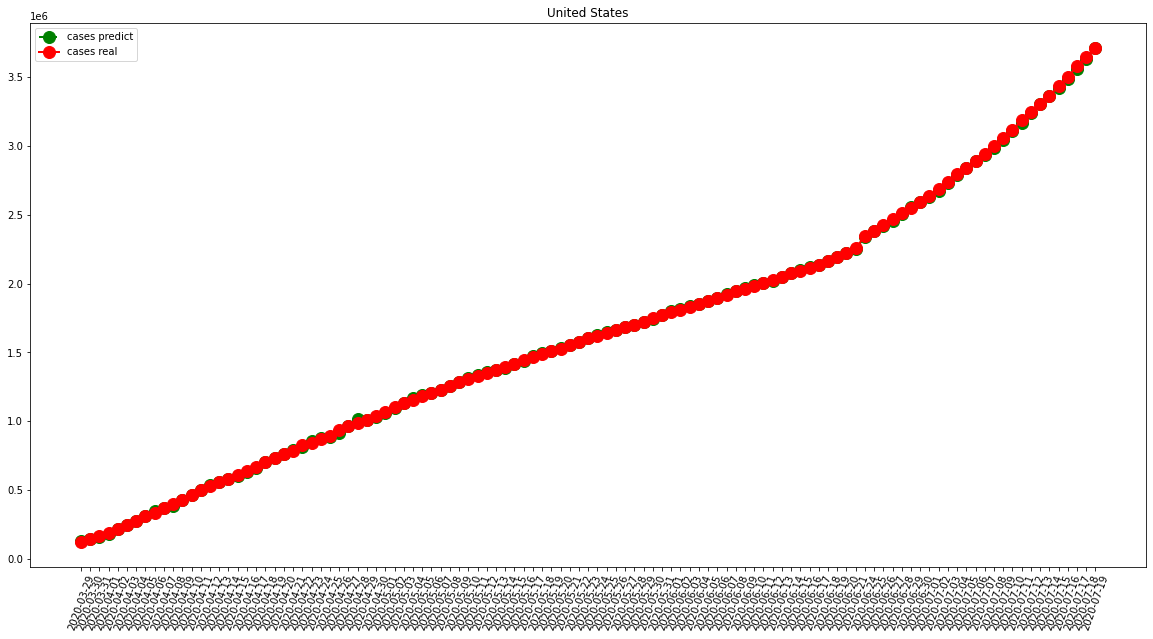

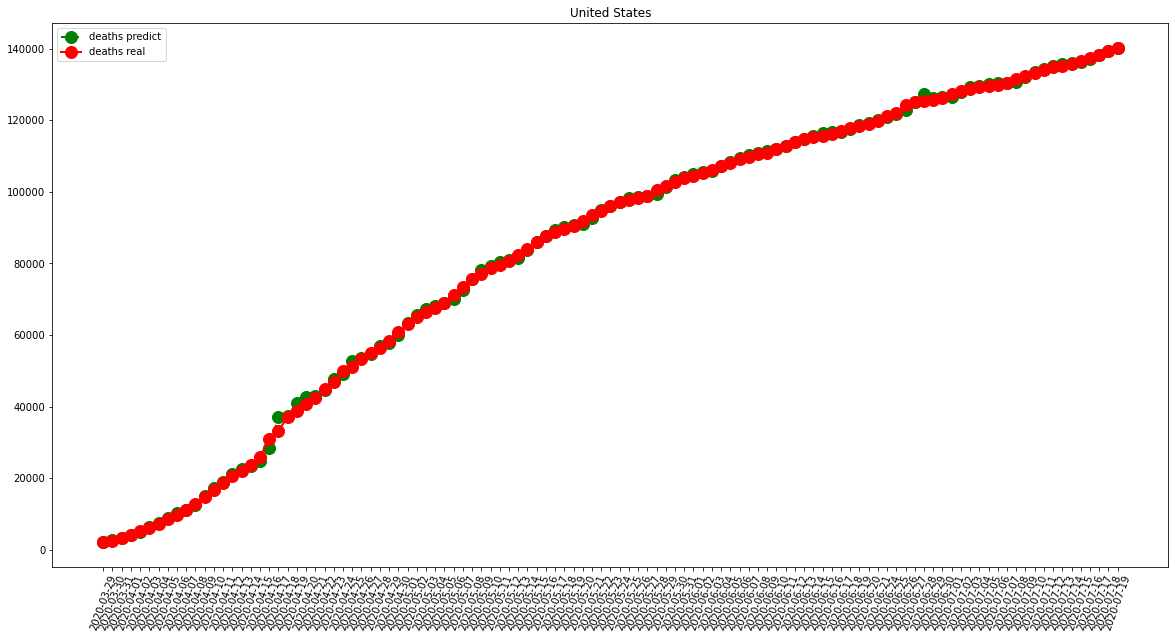

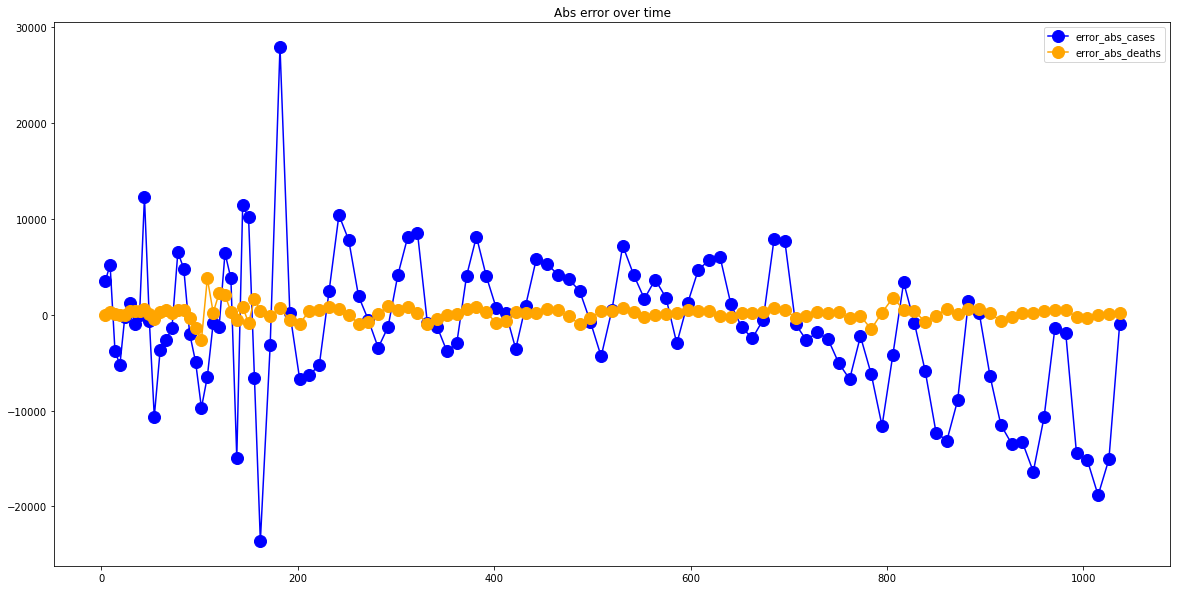

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  82.37837837837837
RMSE =  112.12910833916827
-- China performances for deaths --
MAE =  35.468468468468465
RMSE =  148.99594891403186


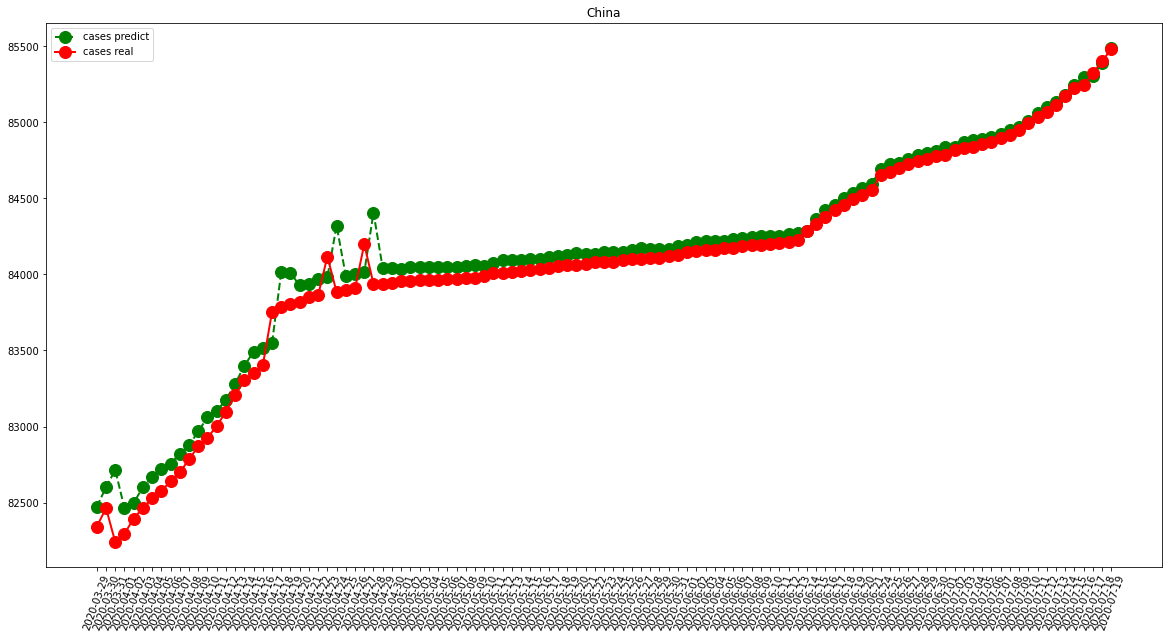

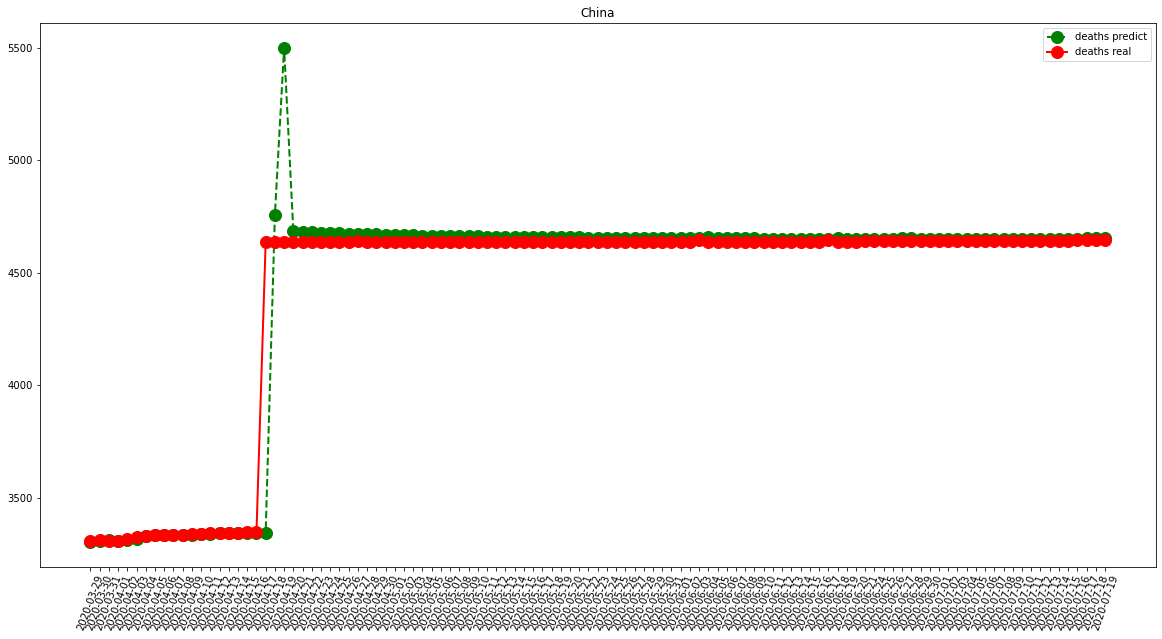

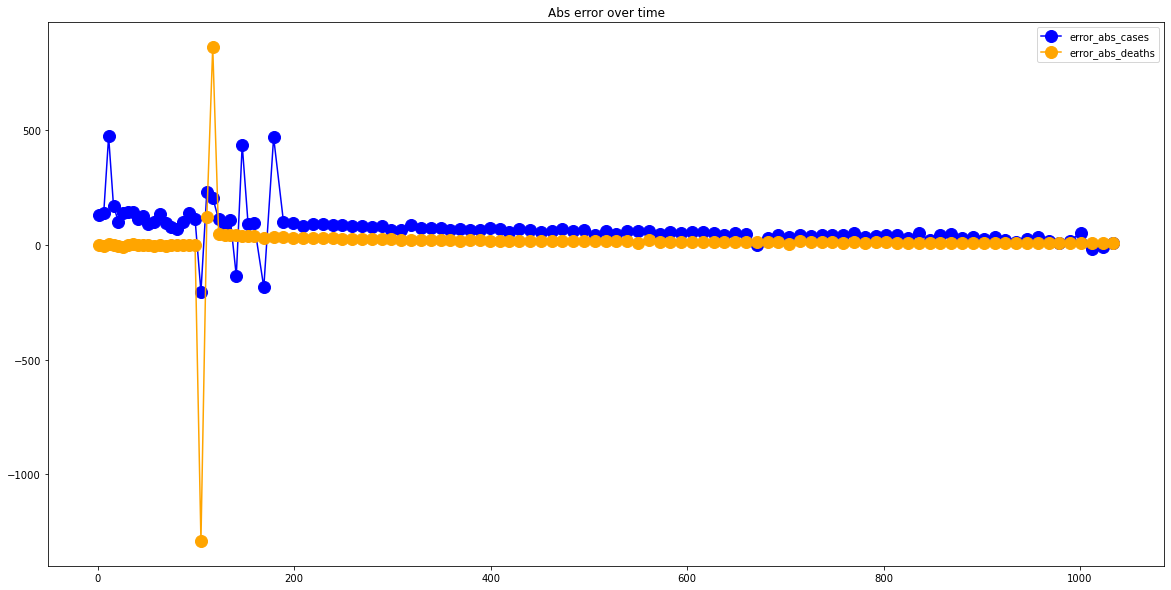

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1430.9638554216867
RMSE =  4579.238225173655
-- United Kingdom performances for deaths --
MAE =  221.24096385542168
RMSE =  537.8231782699006


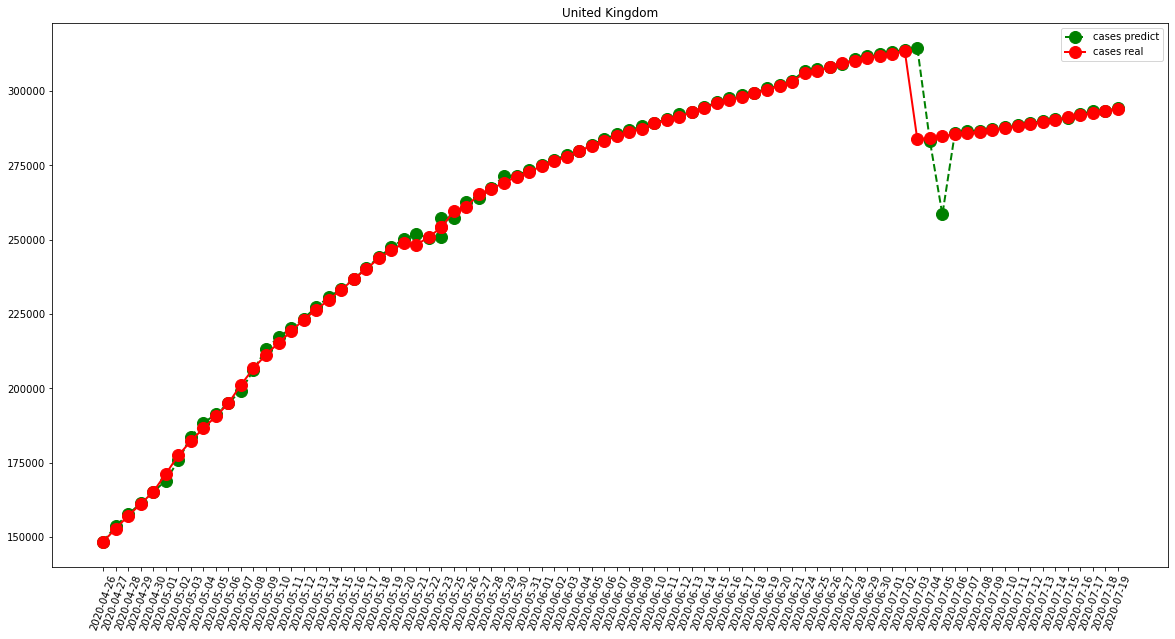

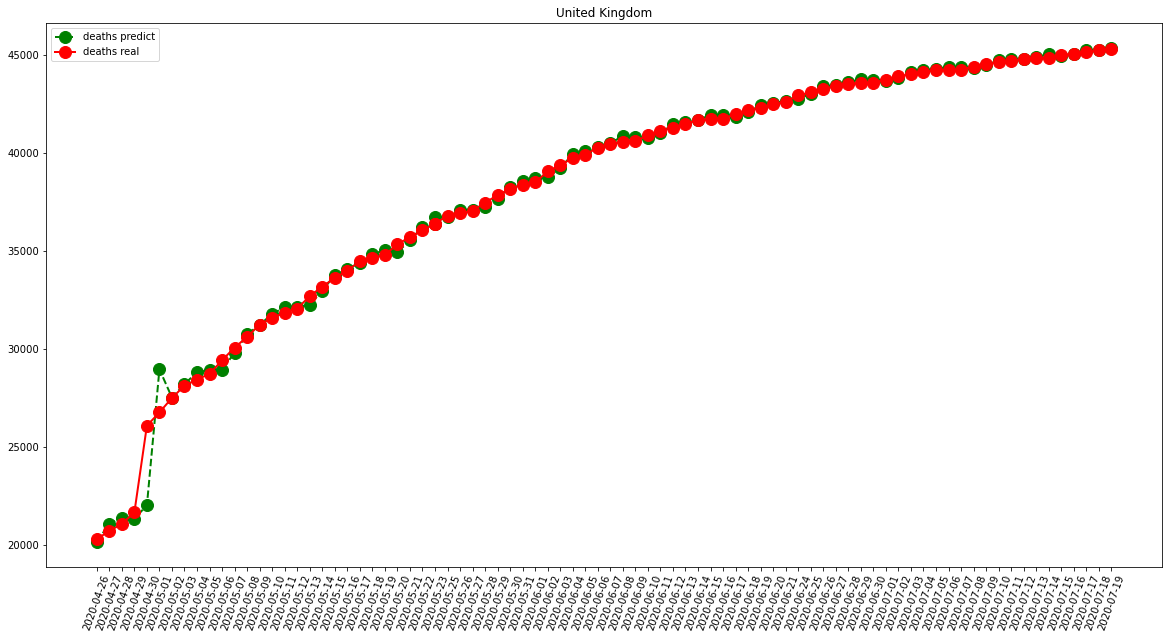

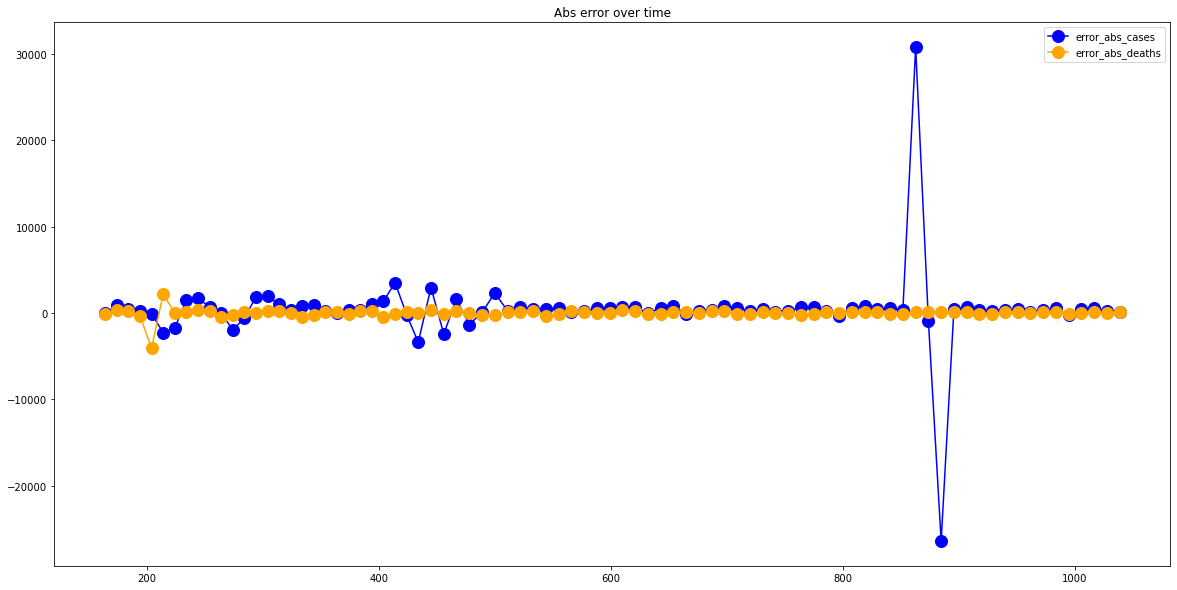

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  298.56626506024094
RMSE =  419.575703639209
-- Germany performances for deaths --
MAE =  28.16867469879518
RMSE =  47.88968246655002


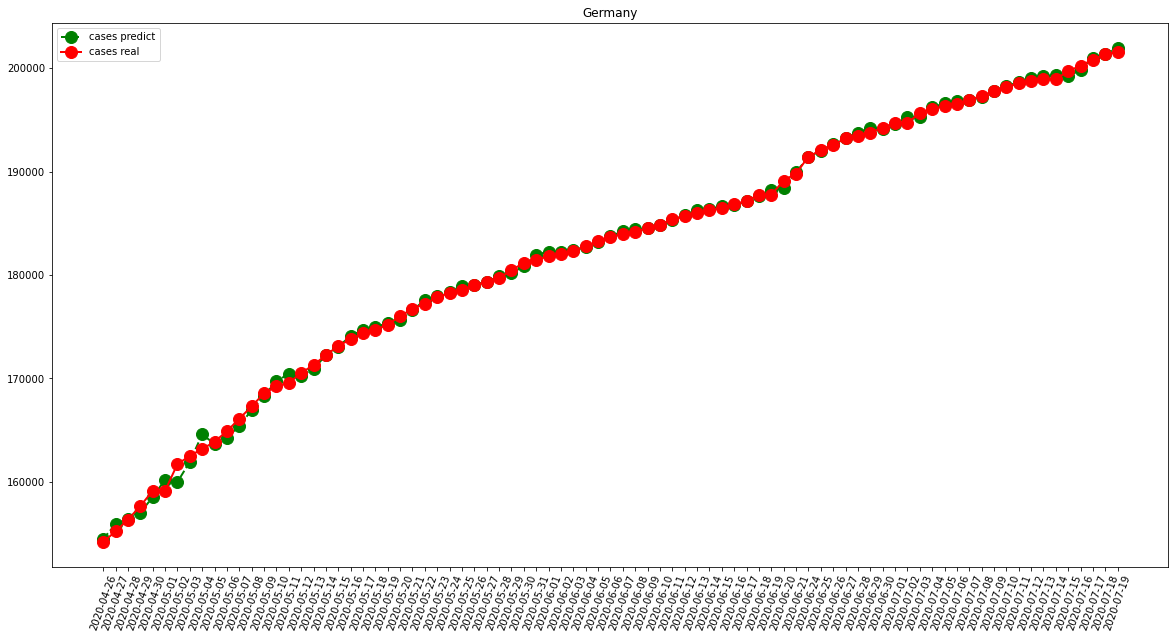

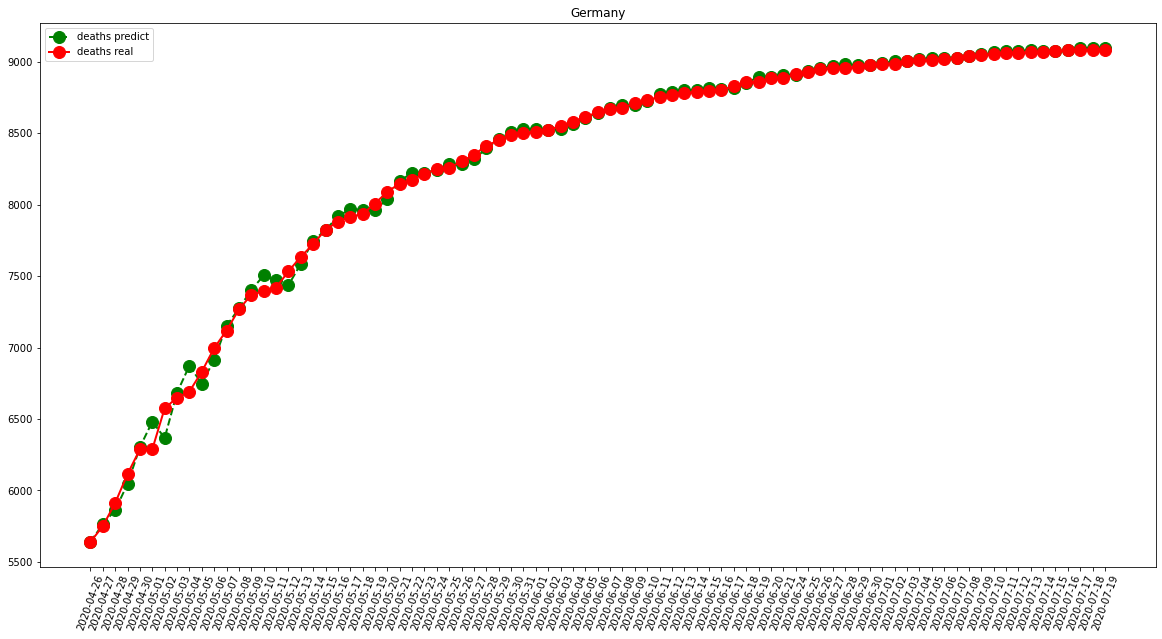

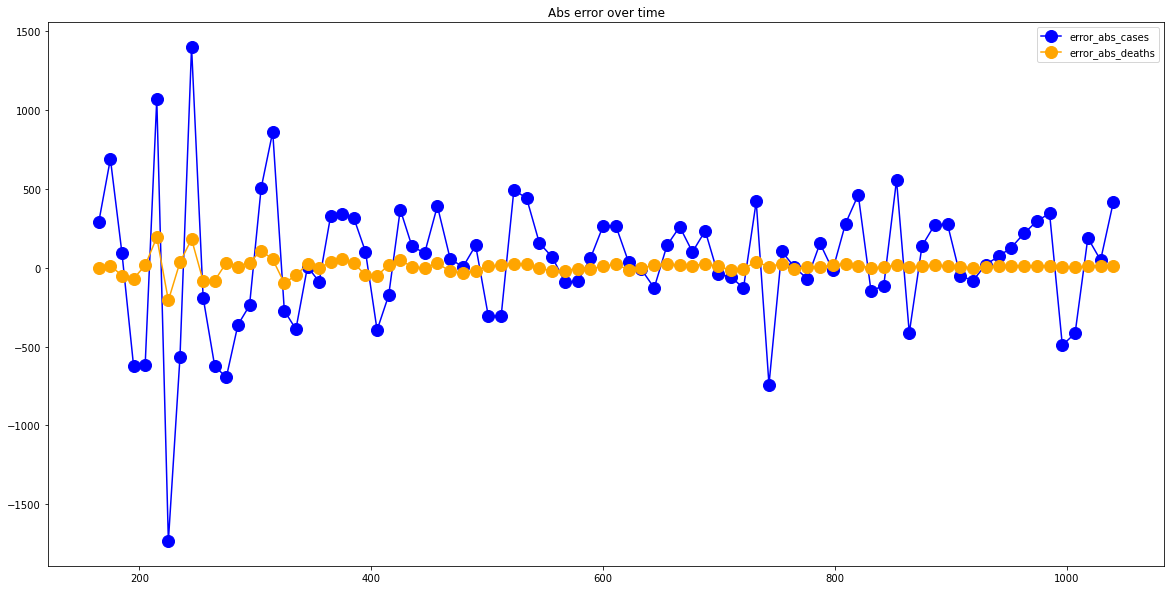

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  389.31325301204816
RMSE =  506.4786178719155
-- Iran performances for deaths --
MAE =  18.927710843373493
RMSE =  29.477988520740617


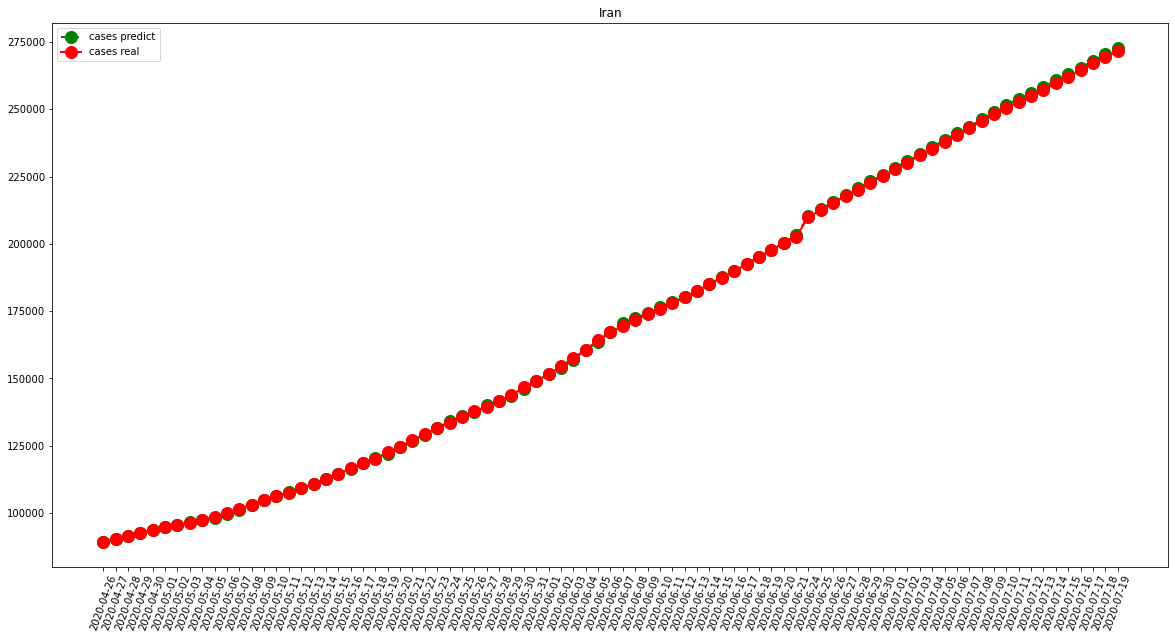

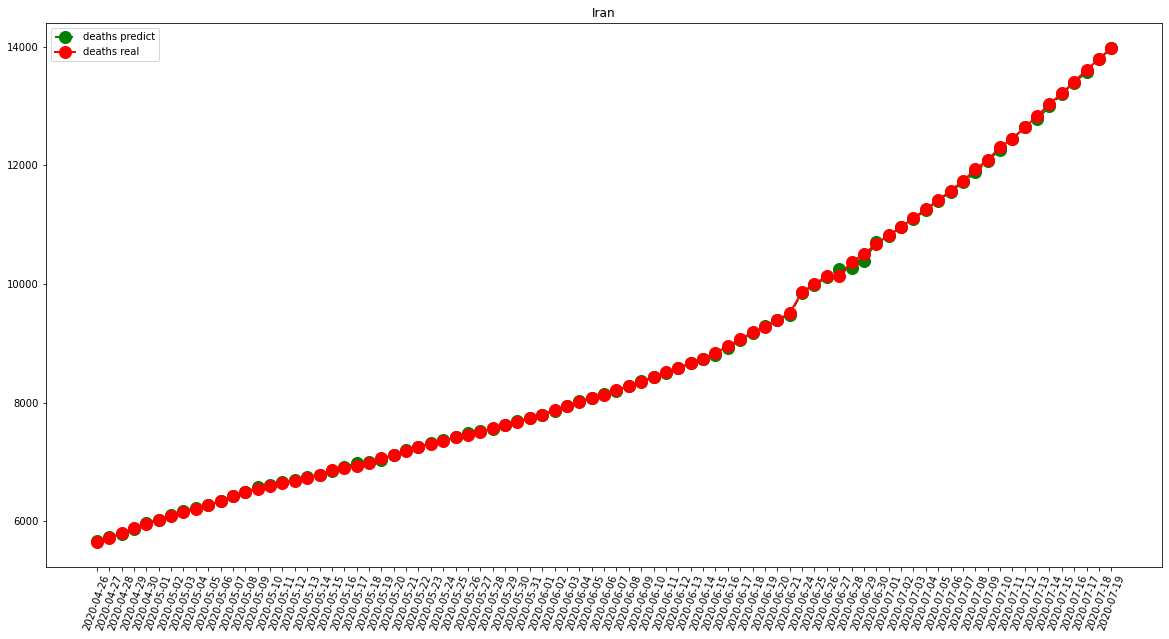

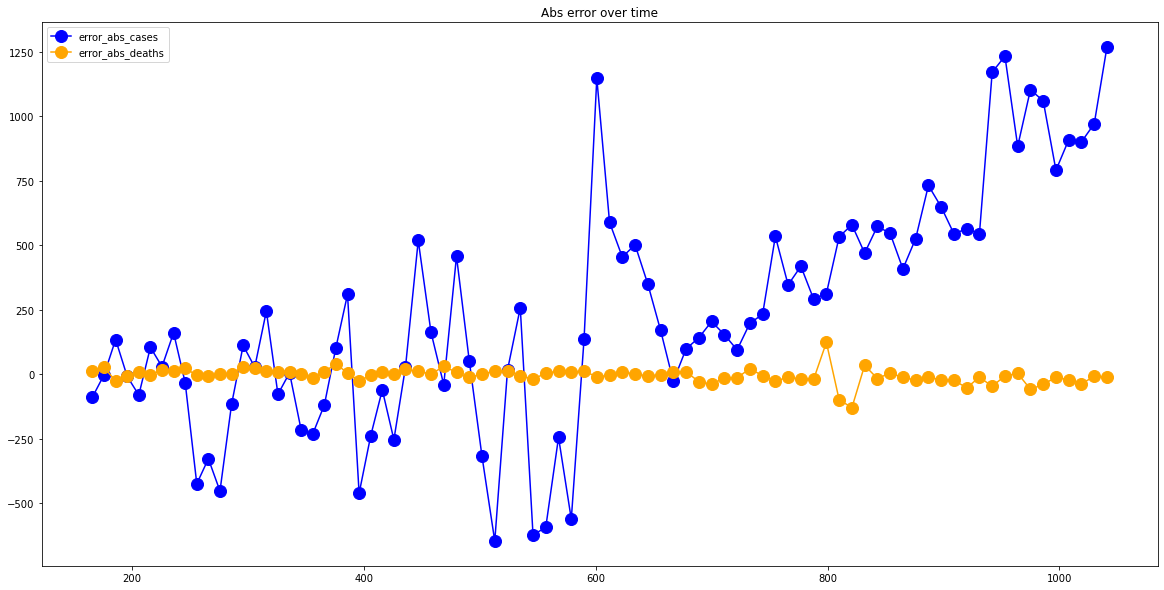

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  227.87951807228916
RMSE =  377.0234724724453
-- Turkey performances for deaths --
MAE =  22.46987951807229
RMSE =  111.41796917652775


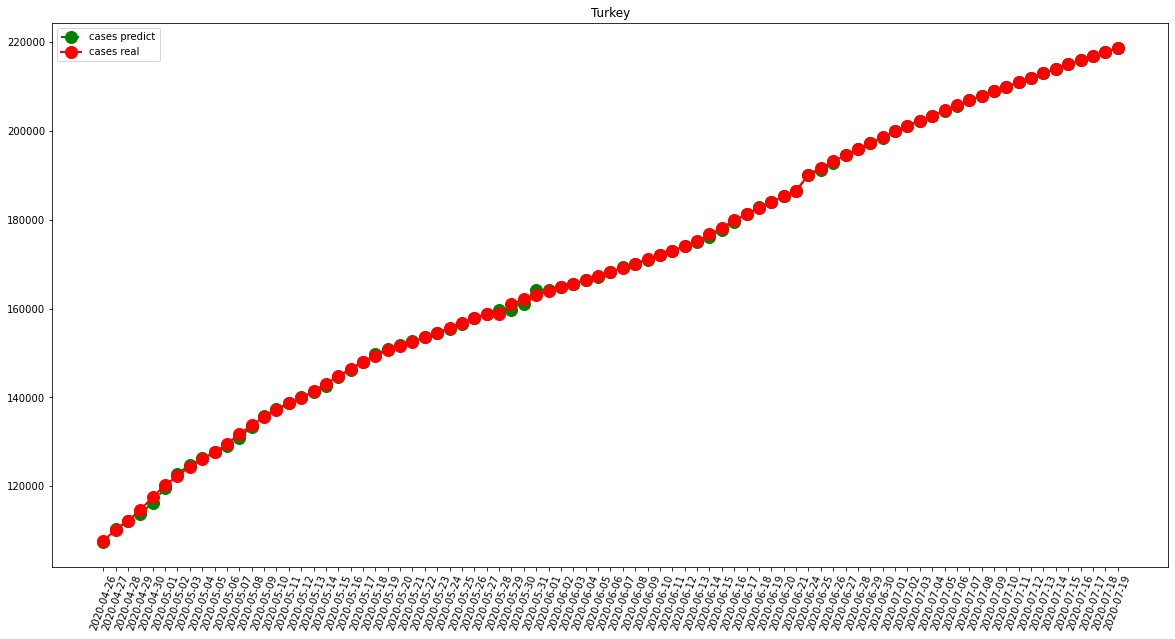

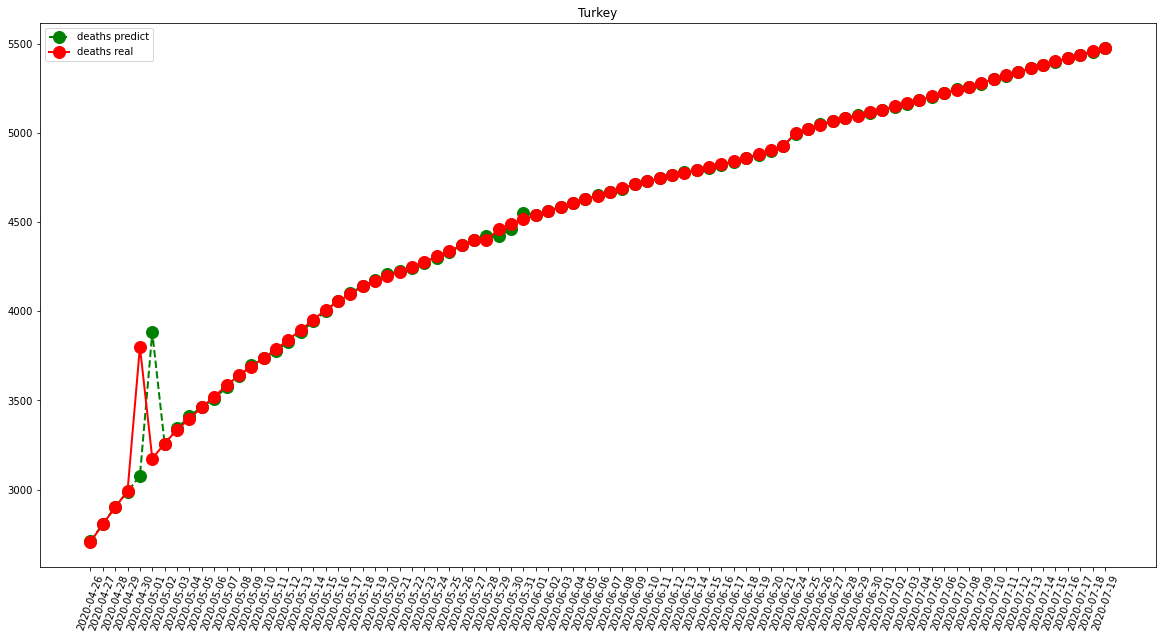

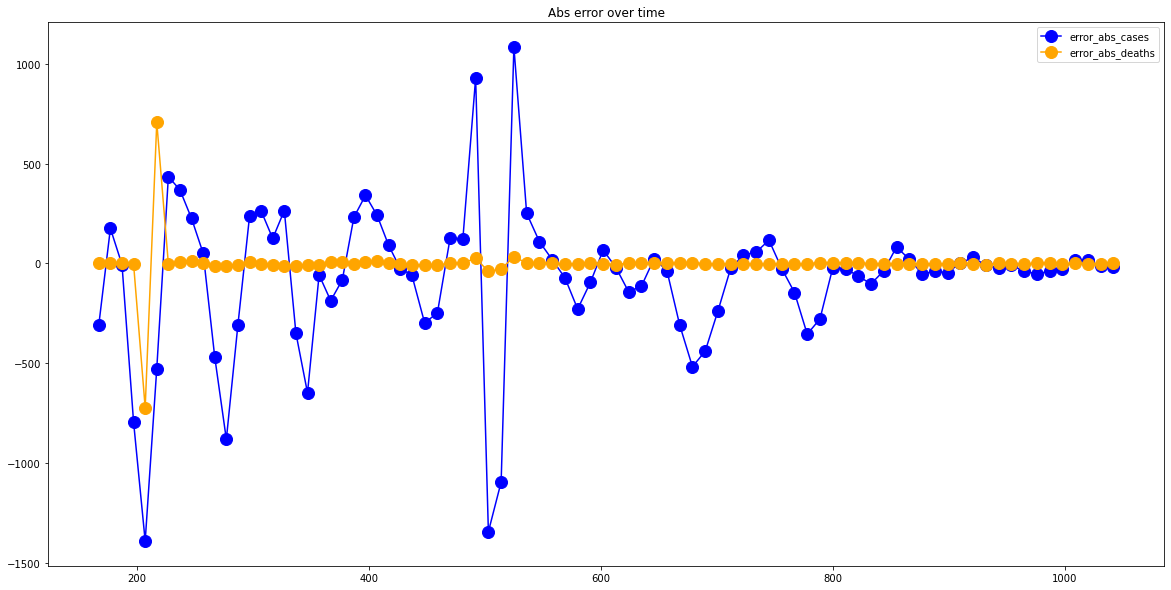

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9884.267857142857
RMSE =  12974.178248819571
-- Brazil performances for deaths --
MAE =  367.6607142857143
RMSE =  455.1938951071918


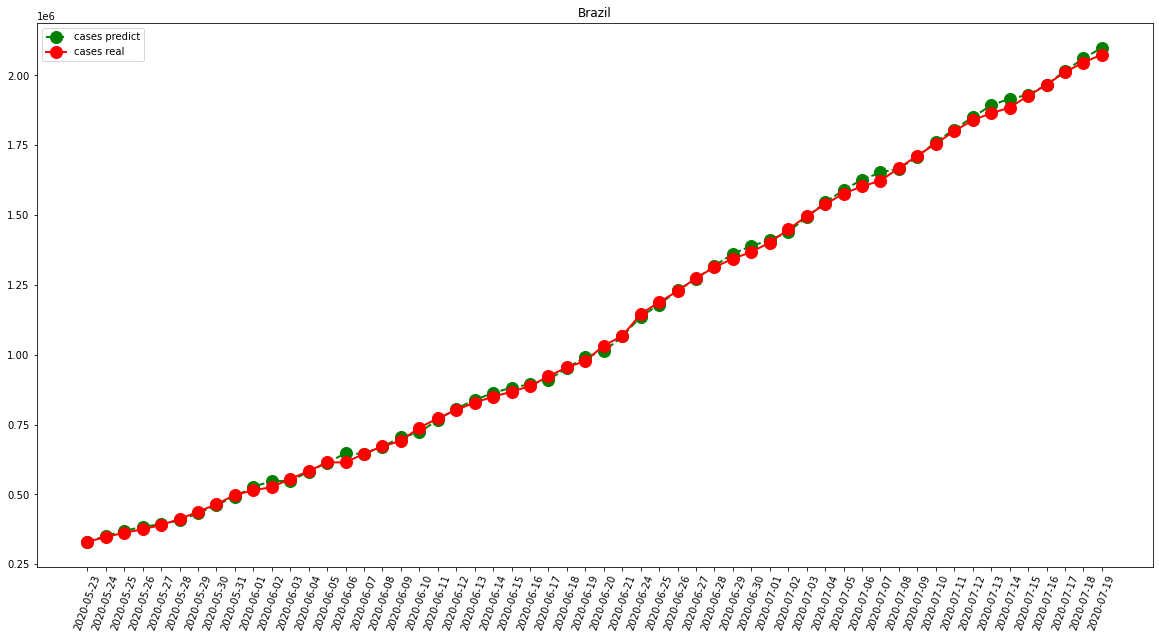

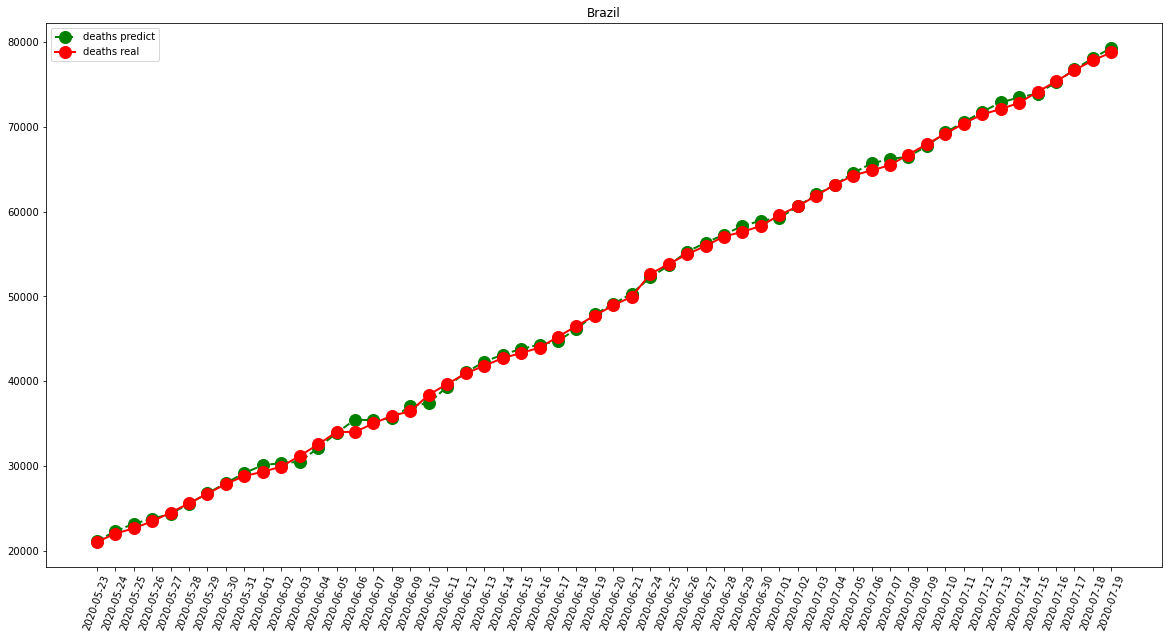

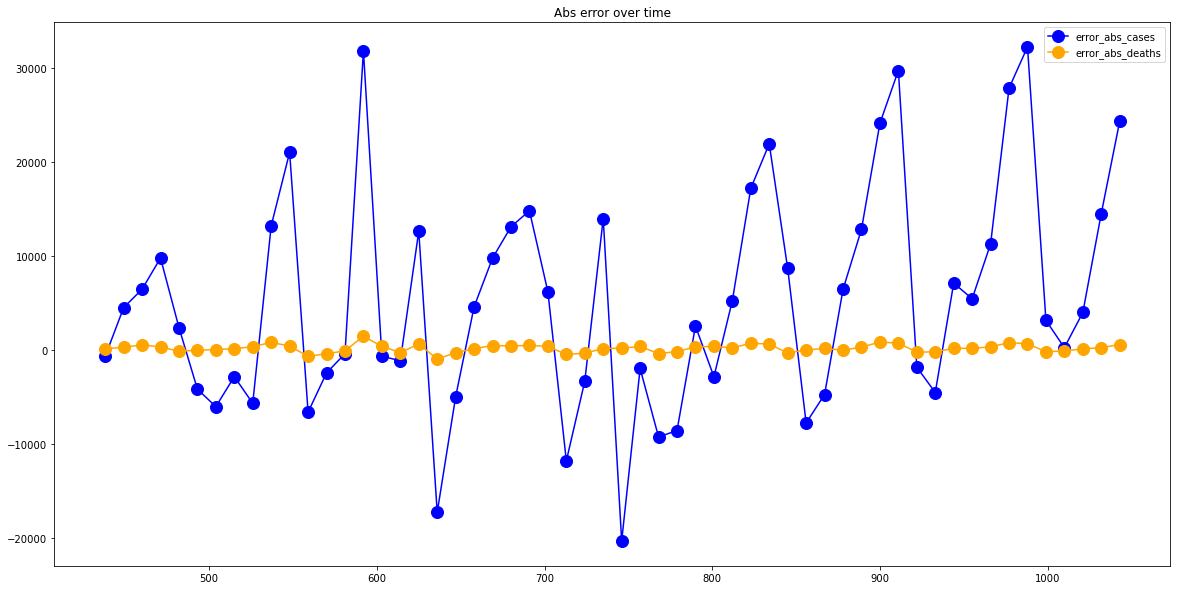

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)